In [6]:
import requests
import torch

from PIL import Image

from lavis.models import model_zoo, load_model
from lavis.processors import load_processor

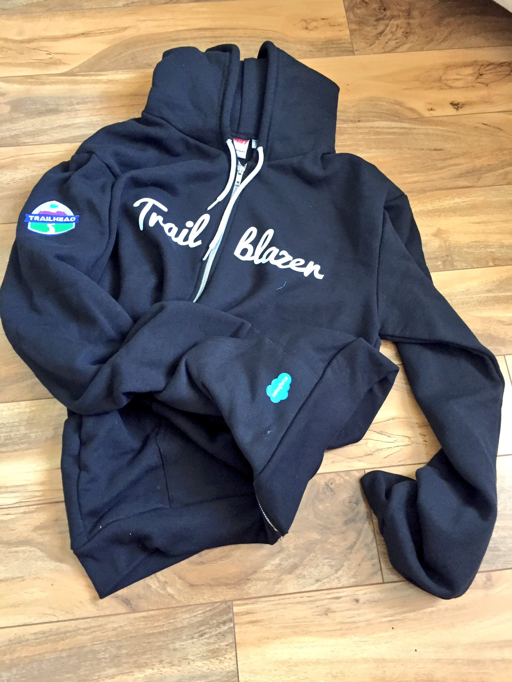

In [15]:
def load_demo_image():
    # img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
    img_url = "/export/home/workspace/LAVIS/app/resources/sf-longsleeve.jpeg"
    raw_image = Image.open(img_url).convert("RGB")
    # raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   

    w,h = raw_image.size
    display(raw_image.resize((w//3,h//3)))

    return raw_image
image = load_demo_image()

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model_zoo

Architectures                  Types
albef_classification           base, ve
albef_nlvr                     base
albef_pretrain                 base
albef_retrieval                base, coco, flickr
albef_vqa                      base, vqav2
alpro_qa                       base, msrvtt, msvd
alpro_retrieval                base, msrvtt, didemo
blip_caption                   base, base_coco, large, large_coco
blip_classification            base
blip_pretrain                  base
blip_retrieval                 base, coco, flickr
blip_vqa                       base, vqav2
clip                           ViT-B-32, ViT-B-16, ViT-L-14, ViT-L-14-336, RN50

In [8]:
model = load_model(
    name="blip_caption",
    model_type="base_coco",
    is_eval=True,
    device=device
)

vis_processor = load_processor("blip_image_eval").build(image_size=384)

In [16]:
img = vis_processor(image).unsqueeze(0).to(device)

In [17]:
model.generate({"image": img})

['a black hoodie with the word trail blazers on it']

: 